# Texas Unemployment and Wages Review and Analytics 

## Import the required libraries and dependencies

In [1]:
import plotly.express as px
import pandas as pd
import os
from pathlib import Path
from dotenv import load_dotenv

### Prep the Mapbox API Access Token

In [2]:
# Read the Mapbox API access token from the .env file
load_dotenv()
mapbox_api_access_token = os.getenv("MAPBOX_API_ACCESS_TOKEN")

# Confirm that the mapbox_api_access_token is available
if not mapbox_api_access_token:
    print("Error with the Mapbox API access token. Check the .env file.")

Error with the Mapbox API access token. Check the .env file.


In [3]:
# Set the Mapbox API access token
px.set_mapbox_access_token(mapbox_api_access_token)

### Prepare the DataFrame

In [22]:
# Read in the All_Sector_Employment_and_Wages_Report_by_area.csv and Finance_and_Insurance_Sector_Employment_and_Wages_Report_by_area.csv files into a DataFrame
employment_wages_df = pd.read_csv(
    Path("../Resources/All_Sector_Employment_and_Wages_Report_by_area.csv")
).drop_duplicates()
finance_employment_wages_df = pd.read_csv(
    Path("../Resources/Finance_and_Insurance_Sector_Employment_and_Wages_Report_by_area.csv")
).drop_duplicates()

# Append employment and wages data
all_employment_wages_df = employment_wages_df.append(finance_employment_wages_df)

# Review the DataFrame
display(all_employment_wages_df.head())
display(all_employment_wages_df.tail())


,Year,Period,Area,Ownership,Industry Code,Industry,Level,Establishments,Firms,Average Employment,Average Weekly Wage,Total Wages,Month 1 Employment,Month 2 Employment,Month 3 Employment,Hierarchical Ordering
0,2006,1,Texas,Private,10,"Total, All Industries",0,"515,102","416,752","8,038,695",849,"88,758,786,375","7,973,395","8,025,478","8,117,211",1
1,2006,2,Texas,Private,10,"Total, All Industries",0,"519,735","419,437","8,218,777",793,"84,676,328,496","8,155,790","8,212,863","8,287,677",1
2,2006,3,Texas,Private,10,"Total, All Industries",0,"524,387","423,282","8,309,962",792,"85,541,087,537","8,271,543","8,325,079","8,333,265",1
3,2006,4,Texas,Private,10,"Total, All Industries",0,"526,555","424,841","8,387,231",894,"97,505,107,022","8,324,350","8,389,998","8,447,345",1
4,2007,1,Texas,Private,10,"Total, All Industries",0,"546,806","442,863","8,332,603",897,"97,210,303,102","8,255,788","8,325,113","8,416,907",1


,Year,Period,Area,Ownership,Industry Code,Industry,Level,Establishments,Firms,Average Employment,Average Weekly Wage,Total Wages,Month 1 Employment,Month 2 Employment,Month 3 Employment,Hierarchical Ordering
13703,2020,4,Bexar,Private,52,Finance and Insurance,2,"2,412","1,460","63,608","1,838","1,519,788,106","63,474","63,693","63,656",1775
13704,2020,4,Travis,Private,52,Finance and Insurance,2,"2,633","1,823","37,022","2,710","1,304,276,637","36,710","36,999","37,356",1775
13705,2020,4,Tarrant,Private,52,Finance and Insurance,2,"3,056","2,006","47,534","1,968","1,215,794,720","47,391","47,630","47,580",1775
13706,2020,4,Dallas,Private,52,Finance and Insurance,2,"5,419","3,677","116,937","2,340","3,556,651,413","116,633","116,908","117,270",1775
13707,2020,4,Harris,Private,52,Finance and Insurance,2,"6,789","4,303","77,575","2,502","2,523,501,823","77,366","77,656","77,704",1775


In [7]:
# Read in the US_Inflation.csv file into a DataFrame
us_Inflation_df = pd.read_csv(
    Path("../Resources/US_Inflation.csv")
).drop_duplicates()

# Review the DataFrame
display(us_Inflation_df.head())
display(us_Inflation_df.tail())


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2006,0.040,0.036,0.034,0.036,0.040,0.042,0.041,0.039,0.020,0.014,0.020,0.025
1,2007,0.021,0.024,0.028,0.026,0.027,0.027,0.023,0.019,0.028,0.036,0.044,0.041
2,2008,0.043,0.041,0.040,0.039,0.041,0.049,0.055,0.053,0.050,0.037,0.011,0.000
3,2009,-0.001,0.000,-0.004,-0.006,-0.010,-0.012,-0.020,-0.015,-0.014,-0.002,0.019,0.028
4,2010,0.026,0.022,0.023,0.022,0.020,0.011,0.013,0.012,0.011,0.012,0.011,0.014


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
11,2017,0.025,0.028,0.024,0.022,0.019,0.017,0.017,0.019,0.022,0.020,0.022,0.021
12,2018,0.021,0.022,0.024,0.025,0.028,0.028,0.029,0.027,0.023,0.025,0.022,0.019
13,2019,0.015,0.015,0.019,0.020,0.018,0.017,0.018,0.017,0.017,0.018,0.020,0.023
14,2020,0.025,0.023,0.015,0.003,0.002,0.007,0.010,0.013,0.014,0.012,0.011,0.013
15,2021,0.014,0.017,0.026,0.042,0.049,0.053,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Read in the Texas_Unemployment_Rate_by_area.csv file into a DataFrame
unemployment_Rate_df = pd.read_csv(
    Path("../Resources/Texas_Unemployment_Rate_by_area.csv")
).drop_duplicates()

# Review the DataFrame
display(unemployment_Rate_df.head())
display(unemployment_Rate_df.tail())

,Year,Period,Area,Area Type,Adjustment,Employment,Civilian Labor Force,Unemployment,Unemployment Rate,Unnamed: 9,Unnamed: 10
0,2006,Annual,Texas,Texas,Not Adjusted,"10,770,786","11,335,112","564,326",0.050,NaN,NaN
1,2006,January,Texas,Texas,Not Adjusted,"10,575,831","11,169,955","594,124",0.053,NaN,NaN
2,2006,January,Texas,Texas,Adjusted,"10,647,444","11,240,453","593,009",0.053,NaN,NaN
3,2006,February,Texas,Texas,Not Adjusted,"10,620,818","11,224,932","604,114",0.054,NaN,NaN
4,2006,February,Texas,Texas,Adjusted,"10,664,814","11,253,367","588,553",0.052,NaN,NaN


,Year,Period,Area,Area Type,Adjustment,Employment,Civilian Labor Force,Unemployment,Unemployment Rate,Unnamed: 9,Unnamed: 10
57064,2021,February,Zavala ...,County,Not Adjusted,"2,996","3,562",566,0.159,NaN,NaN
57065,2021,March,Zavala ...,County,Not Adjusted,"3,012","3,537",525,0.148,NaN,NaN
57066,2021,April,Zavala ...,County,Not Adjusted,"2,952","3,426",474,0.138,NaN,NaN
57067,2021,May,Zavala ...,County,Not Adjusted,"2,921","3,338",417,0.125,NaN,NaN
57068,2021,June,Zavala ...,County,Not Adjusted,"2,885","3,365",480,0.143,NaN,NaN


In [24]:
# Filter the DataFrame to include only Texas state data
tx_data = all_employment_wages_df[(all_employment_wages_df["Area"] == "Texas")]

# Review the DataFrame
display(tx_data.head())
display(tx_data.tail())


,Year,Period,Area,Ownership,Industry Code,Industry,Level,Establishments,Firms,Average Employment,Average Weekly Wage,Total Wages,Month 1 Employment,Month 2 Employment,Month 3 Employment,Hierarchical Ordering
0,2006,1,Texas,Private,10,"Total, All Industries",0,"515,102","416,752","8,038,695",849,"88,758,786,375","7,973,395","8,025,478","8,117,211",1
1,2006,2,Texas,Private,10,"Total, All Industries",0,"519,735","419,437","8,218,777",793,"84,676,328,496","8,155,790","8,212,863","8,287,677",1
2,2006,3,Texas,Private,10,"Total, All Industries",0,"524,387","423,282","8,309,962",792,"85,541,087,537","8,271,543","8,325,079","8,333,265",1
3,2006,4,Texas,Private,10,"Total, All Industries",0,"526,555","424,841","8,387,231",894,"97,505,107,022","8,324,350","8,389,998","8,447,345",1
4,2007,1,Texas,Private,10,"Total, All Industries",0,"546,806","442,863","8,332,603",897,"97,210,303,102","8,255,788","8,325,113","8,416,907",1


,Year,Period,Area,Ownership,Industry Code,Industry,Level,Establishments,Firms,Average Employment,Average Weekly Wage,Total Wages,Month 1 Employment,Month 2 Employment,Month 3 Employment,Hierarchical Ordering
55,2019,4,Texas,Private,52,Finance and Insurance,2,"42,659","24,229","555,969","1,844","13,326,727,981","554,340","556,103","557,465",1775
56,2020,1,Texas,Private,52,Finance and Insurance,2,"43,032","24,616","556,839","2,299","16,642,597,166","555,288","557,660","557,569",1775
57,2020,2,Texas,Private,52,Finance and Insurance,2,"43,303","24,729","554,528","1,746","12,590,051,149","552,591","554,222","556,772",1775
58,2020,3,Texas,Private,52,Finance and Insurance,2,"43,688","24,970","559,447","1,719","12,501,033,877","557,795","560,220","560,325",1775
59,2020,4,Texas,Private,52,Finance and Insurance,2,"43,719","25,156","567,414","2,067","15,248,157,860","565,259","567,662","569,320",1775


In [17]:
# Create a DataFrame consisting of the CityName, PopulationCount, Latitude and Longitude columns
ny_plot_df = ny_data[["CityName", "PopulationCount", "Latitude", "Longitude"]]

# Review the DataFrame
ny_plot_df.head()

,CityName,PopulationCount,Latitude,Longitude
483854,Albany,2393,42.660364,-73.765214
483858,Albany,97856,42.666397,-73.798683
483860,Albany,2139,42.668922,-73.736313
483861,Albany,6046,42.664413,-73.751504
483862,Albany,5888,42.680903,-73.782682


In [18]:
# Aggregate all columns by CityName
ny_plot_df.groupby('CityName').sum()

,PopulationCount,Latitude,Longitude
CityName,,,
Albany,391424,2303.679834,-3984.343100
Buffalo,1045240,6865.515498,-12615.879974
Mount Vernon,269168,1718.361217,-3100.942100
New Rochelle,308248,1309.434711,-2361.113032
New York,32700532,174347.556785,-316506.826218
Rochester,842260,7251.631927,-13038.413050
Schenectady,264540,1797.846419,-3105.129062
Syracuse,580680,4906.963147,-8680.587265
Yonkers,783904,4257.731195,-7682.499631


In [19]:
# Aggregate only Population Count by CityName (since it doesn't make sense to accumulate Latitude nor Longitude)
ny_plot_df.groupby('CityName')['PopulationCount'].sum()

CityName
Albany            391424
Buffalo          1045240
Mount Vernon      269168
New Rochelle      308248
New York        32700532
Rochester         842260
Schenectady       264540
Syracuse          580680
Yonkers           783904
Name: PopulationCount, dtype: int64

### Plot data

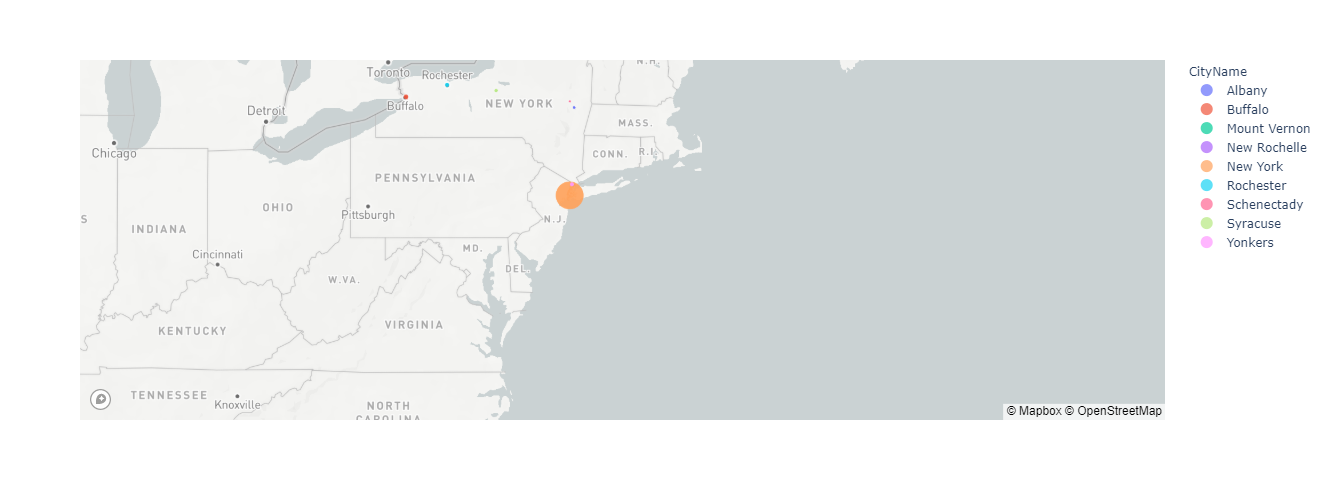

In [20]:
# Plot the data using the Mapbox API
map_plot = px.scatter_mapbox(
    ny_plot_df,
    lat="Latitude",
    lon="Longitude",
    size="PopulationCount",
    color="CityName",
    height=500, 
    zoom=4
)

# Display the map
map_plot.show()